In [6]:
!nvidia-smi

Tue Jun 18 16:09:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import os

# Define the path to the folder in your Google Drive
folder_path = '/content/drive/My Drive/Computer Vision'

# List all files in the folder
file_names = os.listdir(folder_path)
print(file_names)

['rat_12.jpg', 'rat_49.jpg', 'rat_47.jpg', 'rat_57.jpg', 'rat_17.jpg', 'rat_55.jpg', 'rat_43.jpg', 'rat_18.jpg', 'rat_5.jpg', 'rat_70.jpg', 'rat_6.jpg', 'rat_64.jpg', 'rat_8.jpg', 'rat_2.jpg', 'rat_41.jpg', 'rat_96.jpg', 'rat_13.jpg', 'rat_66.jpg', 'rat_45.jpg', 'rat_3.jpg', 'rat_20.jpg', 'rat_88.jpg', 'rat_100.jpg', 'rat_94.jpg', 'rat_74.jpg', 'rat_110.jpg', 'rat_68.jpg', 'rat_137.jpg', 'rat_59.jpg', 'rat_119.jpg', 'rat_127.jpg', 'rat_86.jpg', 'rat_53.jpg', 'rat_7.jpg', 'rat_1.jpg', 'rat_78.jpg', 'rat_80.jpg', 'rat_19.jpg', 'rat_98.jpg', 'rat_117.jpg', 'rat_51.jpg', 'rat_84.jpg', 'rat_11.jpg', 'rat_104.jpg', 'rat_123.jpg', 'rat_121.jpg', 'rat_151.jpg', 'rat_129.jpg', 'rat_92.jpg', 'rat_102.jpg', 'rat_145.jpg', 'rat_108.jpg', 'rat_82.jpg', 'rat_147.jpg', 'rat_76.jpg', 'rat_106.jpg', 'rat_143.jpg', 'rat_72.jpg', 'rat_196.jpg', 'rat_190.jpg', 'rat_153.jpg', 'rat_172.jpg', 'rat_180.jpg', 'rat_131.jpg', 'rat_115.jpg', 'rat_141.jpg', 'rat_288.jpg', 'rat_90.jpg', 'rat_125.jpg', 'rat_166.jpg'

In [7]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO

# we use latest Grounding DINO model API that is not official yet
#!git checkout feature/more_compact_inference_api

!pip install -q -e .
!pip install -q roboflow #dataclasses-json onemetric

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 443 (delta 158), reused 139 (delta 130), pack-reused 231
Receiving objects: 100% (443/443), 12.86 MiB | 11.80 MiB/s, done.
Resolving deltas: 100% (229/229), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 25.1 MB/s eta 0:00:00
     ━━━━━━

In [8]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [9]:
# download weights file

%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [10]:
WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [11]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/GroundingDINO


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [13]:
IMAGE_PATH = "/content/drive/MyDrive/Computer Vision/rat_20.jpg"
TEXT_PROMPT = "rat"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


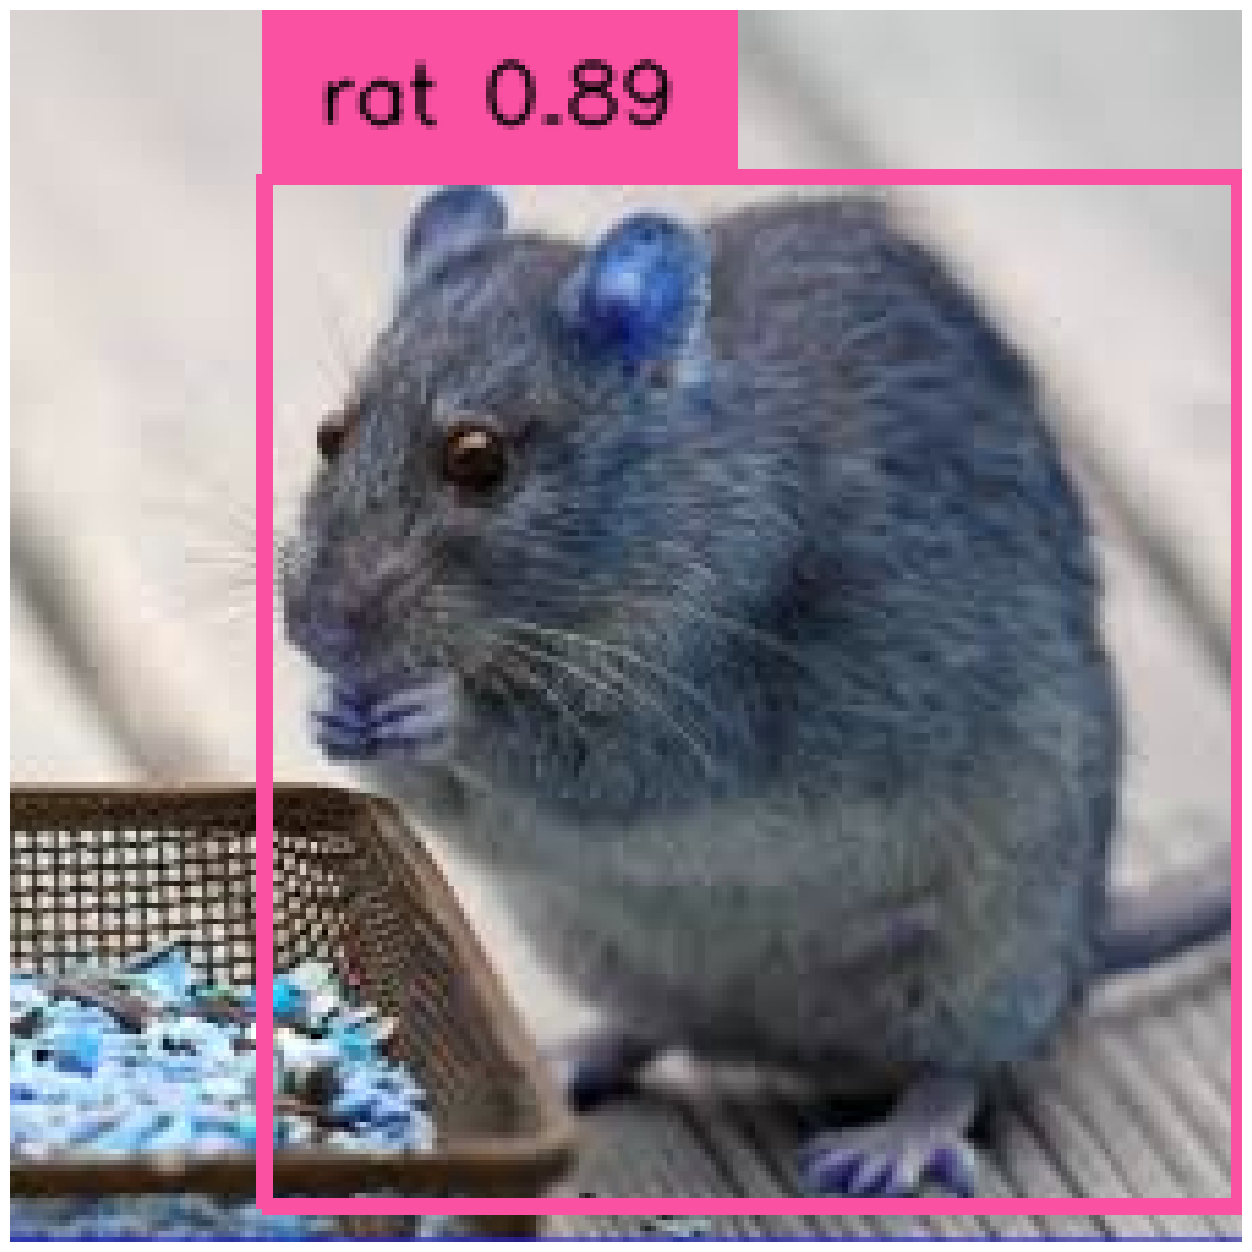

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source,boxes=boxes, logits=logits, phrases=phrases)

# Display example annotated image
plt.figure(figsize=(16, 16))
plt.imshow(annotated_frame)
plt.axis('off')  # Hide the axes
plt.show()

SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


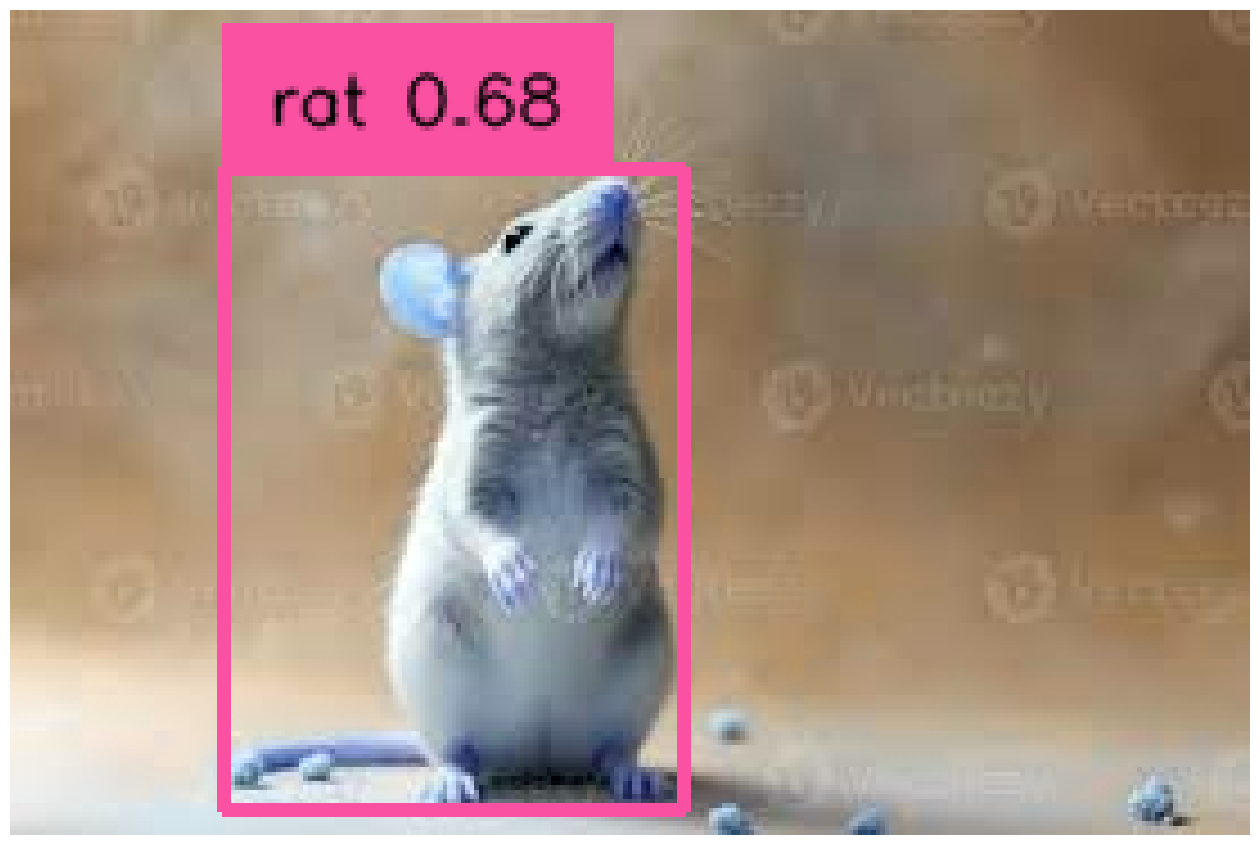

In [15]:
IMAGE_PATH = "/content/drive/MyDrive/Computer Vision/rat_23.jpg"

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source,boxes=boxes, logits=logits, phrases=phrases)

# Display example annotated image
plt.figure(figsize=(16, 16))
plt.imshow(annotated_frame)
plt.axis('off')  # Hide the axes
plt.show()

In [21]:
import random

# Select a random item
random_file = random.choice(file_names)

print(random_file)

rat_357.jpg


In [20]:
TEXT_PROMPT = "rat"

image_path = os.path.join("/content/drive/MyDrive/Computer Vision", random_file)
print(image_path)

/content/drive/MyDrive/Computer Vision/rat_174.jpg


In [26]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the output directory
output_directory = "/content/drive/MyDrive/Annotated2 Images"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

In [31]:
for file in file_names:
  image_path = os.path.join("/content/drive/MyDrive/Computer Vision", file)
  image_source, image = load_image(image_path)

  boxes, logits, phrases = predict(
      model=model,
      image=image,
      caption=TEXT_PROMPT,
      box_threshold=BOX_TRESHOLD,
      text_threshold=TEXT_TRESHOLD
  )

  annotated_frame = annotate(image_source=image_source,boxes=boxes, logits=logits, phrases=phrases)

  # Display and save the annotated image
  plt.figure(figsize=(16, 16))
  plt.imshow(annotated_frame)
  plt.axis('off')  # Hide the axes

  # Save the plot
  output_image_path = os.path.join(output_directory, f"annotated_{file}.png")
  plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0)
  plt.close()

The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead
annotate is deprecated: `BoxAnnota

In [ ]:
from roboflow import Roboflow
import roboflow

roboflow.login()

rf = Roboflow()

#rf = Roboflow(api_key="ULUfcs475oo0dWNDRqDv")

project = rf.workspace("workspace-8g85u").project("rat-detection")

dataset = project.version(2).download("coco")